# Template notebook for downloading data and then using it in your project

1) [Identify a dataset you want to work with](#identify-dataset)
2) [Load the dataset using `lamin`](#download-dataset)
3) [Use the dataset in your project](#use-dataset)

In [19]:
# !pip install lamindb[bionty] spatialdata spatialdata-plot

In [1]:
!lamin connect scverse/spatialdata-db

→ connected lamindb: scverse/spatialdata-db


In [4]:
import warnings

import bionty as bt
import lamindb as ln
import spatialdata as sd
import spatialdata_plot
import matplotlib.pyplot as plt
import pandas as pd

warnings.filterwarnings("ignore")

assert ln.setup.settings.instance.slug == "scverse/spatialdata-db"

## 1) Identify a dataset you want to work with <a id="identify-dataset"></a>

The easiest way is probably to go to [lamin.ai/scverse/spatialdata-db/artifacts](https://lamin.ai/scverse/spatialdata-db/artifacts) and identify a dataset you want to work with.

For this example we'll use two human breast cancer samples that were profiled with Visium.

<img src="./human_breast_cancer.png" width="700">






## 2) load the dataset using `lamindb` <a id="download-dataset"></a>

`lamindb` in combination with the `bionty` plugin allow us to easily query for data and load it into memory or save it to disk.


In [5]:
# Define Bionty lookups for autocomplete
organisms = bt.Organism.lookup()
tissues = bt.Tissue.lookup()

In [ ]:
# Query for datasets that originate from human breast tissue whose description contains 'Block'
ln.Artifact.filter(
    organisms=organisms.human,
    tissues=tissues.breast,
    description__icontains="Block"
).df()

,uid,key,description,suffix,kind,otype,size,hash,n_files,n_observations,_hash_type,_key_is_virtual,_overwrite_versions,space_id,storage_id,schema_id,version,is_latest,run_id,created_at,created_by_id,_aux,_branch_code
id,,,,,,,,,,,,,,,,,,,,,,,
627,TNY20rvb3p2soxGs0000,None,Human Breast Cancer (Block A Section 2),.zarr,None,spatialdata,73642848,8pIkoeyuP6vYDz0rYOY55A,327,None,md5-d,True,True,1,2,None,None,True,292,2025-03-13 00:38:02.943757+00:00,8,None,1
628,EF53sCOfQx8yPllK0000,None,Human Breast Cancer (Block A Section 1),.zarr,None,spatialdata,72341494,MNZmlpwYdEsFT75pzHhBEw,327,None,md5-d,True,True,1,2,None,None,True,292,2025-03-13 00:39:33.805090+00:00,8,None,1


In [13]:
# Load a dataset into memory using uid
sdata_section1 = ln.Artifact.get("EF53sCOfQx8yPllK0000").load()
sdata_section1

! run input wasn't tracked, call `ln.track()` and re-run


SpatialData object, with associated Zarr store: /home/lukas/.cache/lamindb/scverse-spatial-eu-central-1/.lamindb/EF53sCOfQx8yPllK.zarr
├── Images
│     ├── 'V1_Breast_Cancer_Block_A_Section_1_full_image': DataTree[cyx] (3, 2000, 2000), (3, 1000, 1000), (3, 500, 500), (3, 250, 250), (3, 125, 125)
│     ├── 'V1_Breast_Cancer_Block_A_Section_1_hires_image': DataArray[cyx] (3, 2000, 2000)
│     └── 'V1_Breast_Cancer_Block_A_Section_1_lowres_image': DataArray[cyx] (3, 600, 600)
├── Shapes
│     └── 'V1_Breast_Cancer_Block_A_Section_1': GeoDataFrame shape: (3798, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (3798, 36601)
with coordinate systems:
    ▸ 'downscaled_hires', with elements:
        V1_Breast_Cancer_Block_A_Section_1_hires_image (Images), V1_Breast_Cancer_Block_A_Section_1 (Shapes)
    ▸ 'downscaled_lowres', with elements:
        V1_Breast_Cancer_Block_A_Section_1_lowres_image (Images), V1_Breast_Cancer_Block_A_Section_1 (Shapes)
    ▸ 'global', with elements:
        V1_

In [ ]:
# Load the same dataset using a very explicit query
sdata_section1_query = ln.Artifact.filter(
    organisms=organisms.human,
    tissues=tissues.breast,
    description__icontains="Block A Section 1"
).one().load()
sdata_section1_query

! run input wasn't tracked, call `ln.track()` and re-run


SpatialData object, with associated Zarr store: /home/lukas/.cache/lamindb/scverse-spatial-eu-central-1/.lamindb/EF53sCOfQx8yPllK.zarr
├── Images
│     ├── 'V1_Breast_Cancer_Block_A_Section_1_full_image': DataTree[cyx] (3, 2000, 2000), (3, 1000, 1000), (3, 500, 500), (3, 250, 250), (3, 125, 125)
│     ├── 'V1_Breast_Cancer_Block_A_Section_1_hires_image': DataArray[cyx] (3, 2000, 2000)
│     └── 'V1_Breast_Cancer_Block_A_Section_1_lowres_image': DataArray[cyx] (3, 600, 600)
├── Shapes
│     └── 'V1_Breast_Cancer_Block_A_Section_1': GeoDataFrame shape: (3798, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (3798, 36601)
with coordinate systems:
    ▸ 'downscaled_hires', with elements:
        V1_Breast_Cancer_Block_A_Section_1_hires_image (Images), V1_Breast_Cancer_Block_A_Section_1 (Shapes)
    ▸ 'downscaled_lowres', with elements:
        V1_Breast_Cancer_Block_A_Section_1_lowres_image (Images), V1_Breast_Cancer_Block_A_Section_1 (Shapes)
    ▸ 'global', with elements:
        V1_

In [16]:
section2 = ln.Artifact.get("TNY20rvb3p2soxGs0000")
section2.path.download_to("./sdata_section2.zarr")
sdata_section2 = sd.read_zarr("./sdata_section2.zarr")
sdata_section2

... downloading sdata_section2.zarr: 100.0%


SpatialData object, with associated Zarr store: /home/lukas/code/202503_hackathon_owkin/data/sdata_section2.zarr
├── Images
│     ├── 'V1_Breast_Cancer_Block_A_Section_2_full_image': DataTree[cyx] (3, 2000, 2000), (3, 1000, 1000), (3, 500, 500), (3, 250, 250), (3, 125, 125)
│     ├── 'V1_Breast_Cancer_Block_A_Section_2_hires_image': DataArray[cyx] (3, 2000, 2000)
│     └── 'V1_Breast_Cancer_Block_A_Section_2_lowres_image': DataArray[cyx] (3, 600, 600)
├── Shapes
│     └── 'V1_Breast_Cancer_Block_A_Section_2': GeoDataFrame shape: (3987, 2) (2D shapes)
└── Tables
      └── 'table': AnnData (3987, 36601)
with coordinate systems:
    ▸ 'downscaled_hires', with elements:
        V1_Breast_Cancer_Block_A_Section_2_hires_image (Images), V1_Breast_Cancer_Block_A_Section_2 (Shapes)
    ▸ 'downscaled_lowres', with elements:
        V1_Breast_Cancer_Block_A_Section_2_lowres_image (Images), V1_Breast_Cancer_Block_A_Section_2 (Shapes)
    ▸ 'global', with elements:
        V1_Breast_Cancer_Block_A_

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.04494382..1.011236].
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.028089888..1.011236].


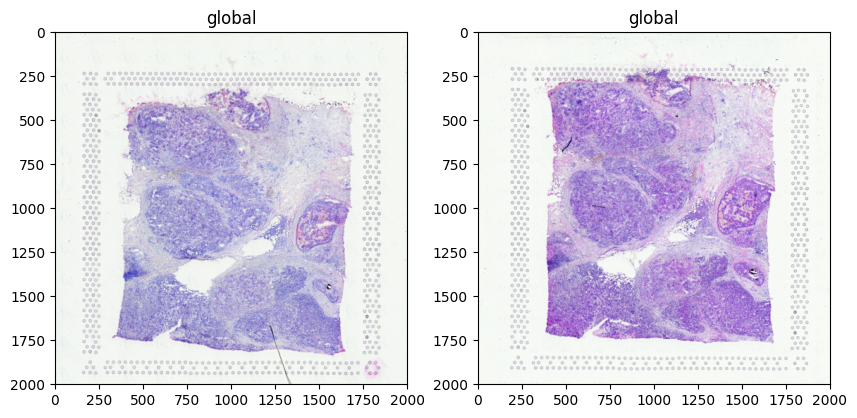

In [17]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(10, 5))

sdata_section1.pl.render_images(
    elements="V1_Breast_Cancer_Block_A_Section_1_full_image"
).pl.show("global", ax=axs[0])

sdata_section2.pl.render_images(
    elements="V1_Breast_Cancer_Block_A_Section_2_full_image"
).pl.show("global", ax=axs[1])

## 3) Use the dataset in your project <a id="use-dataset"></a>

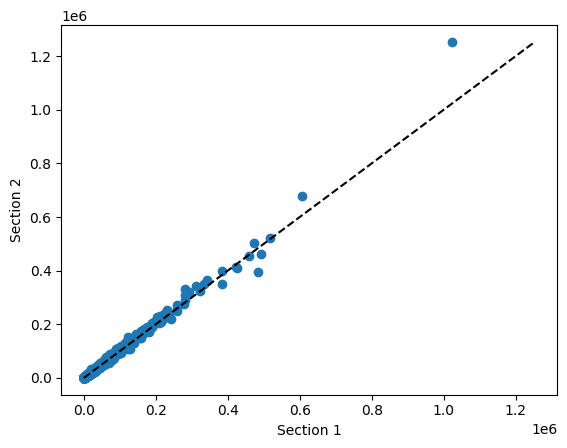

In [ ]:
gene_sums_section1 = sdata_section1.table.to_df().sum(axis=0)
gene_sums_section2 = sdata_section2.table.to_df().sum(axis=0)

# find overlap of genes
overlap_genes = set(gene_sums_section1.index) & set(gene_sums_section2.index)

overlap_adata_section1 = sdata_section1.table[:, sdata_section1.table.var_names.isin(overlap_genes)]
overlap_adata_section2 = sdata_section2.table[:, sdata_section2.table.var_names.isin(overlap_genes)]

# filter the AnnData objects to only include overlap genes
df_for_viz = pd.DataFrame(
    {
        "section1": overlap_adata_section1.to_df().sum(axis=0),
        "section2": overlap_adata_section2.to_df().sum(axis=0),
    }
)

plt.scatter(df_for_viz["section1"], df_for_viz["section2"])
plt.xlabel("Section 1")
plt.ylabel("Section 2")
plt.plot([0, max(df_for_viz["section2"])], [0, max(df_for_viz["section2"])], "k--")
plt.show()